In [48]:
import matplotlib.pyplot as plt
import numpy as np

from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, overwrite_parameters
from ZOEE.modules.variables import variable_importer, Vars, Base
from ZOEE.modules.optimization import optimization, ZOEE_optimization
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg
from ZOEE.modules import functions
#import matplotlib
#update_plotstyle()
#matplotlib.rcParams['lines.linewidth']=1.1

In [49]:
Lat_10,ZMT_10=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMT.txt')

In [50]:
config_HadCM3=importer('Experiments/Tests/Config_HadCM3_seasonal.ini')
#parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3,initialZMT=True,parallel=False,control=True)
config_HadCM3,Sellers=add_sellersparameters(config_HadCM3, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)
CTRL_HadCM3 = rk4alg(config_HadCM3, progressbar=True, monthly=True)

#Vars.T = CTRL_HadCM3[1][-1]
#variable_importer(config_HadCM3,initialZMT=False,parallel=False,control=False)
#Base.number_of_integration=2*365
#HadCM3 = rk4alg(config_HadCM3, progressbar=True, monthly=True)


Loading Configuration from: Experiments/Tests/Config_HadCM3_seasonal.ini
Starting controlrun with 182500 datapoints and equilibrium condition of std(GMT[-30 years]) < 0.001 
Loading Parameters from: ZOEE/config/SellersParameterization.ini


/home/benni/.local/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)


Control still in transit state!



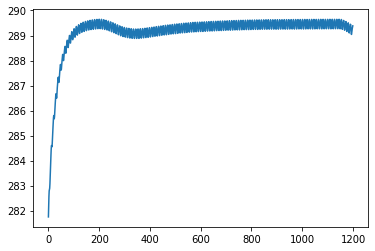

In [44]:
plt.plot(CTRL_HadCM3[2][1:])

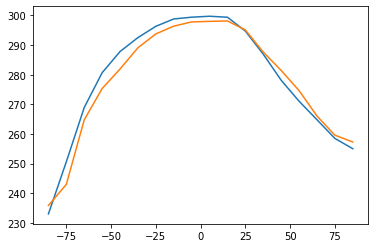

In [47]:
elevation=-0.0065*np.array(Sellers[1][1])
#plt.plot(Lat_10,np.mean(CTRL_HadCM3[1][:-12],axis=0)+elevation)
plt.plot(Lat_10,CTRL_HadCM3[1][-1]+elevation)

plt.plot(Lat_10,ZMT_10)

In [ ]:
Lat_10,HadCM3_LGM_ZMT_target=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMT.csv',delimiter=',')
Lat_10,HadCM3_LGM_ZMT_target_anomaly=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_av_10deg_ZMTanomaly.csv',delimiter=',')
HadCM3_LGM_GMT=np.loadtxt('Experiments/HadCM3/HadCM3_LGM_850_1850_anomaly.txt',delimiter=',')

In [8]:

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""
P0=np.array([70*4.2e6,200,1.9,1.165,1.165,1.165])
#P0=Get_PGamma[0]
Pmin=np.array([1*4.2e6,170,1.3,0.9,0.9,0.9])
Pmax=np.array([100*4.2e6,240,2.5,1.3,1.3,1.3])
P_pert_ratio=1/10000
        

In [9]:
## ZMT anomaly

"""Decleration of optimization configuration"""
grid=np.linspace(-85,85,18)
optimization_setup_LGM_an = optimization(mode='Coupled',
                            target={'ZMT':HadCM3_LGM_ZMT_target_anomaly,'GMT':HadCM3_LGM_GMT[1]},
                            ZMT_response=True, 
                            GMT_response=True,
                            response_average_length=30*12,
                            num_steps=2,
                            num_data=12000,
                            gamma0=1e-8,
                            cost_function_type='LeastSquare',
                            cost_weight='cross_weight',
                            cost_ratio=None,
                            ZMT=HadCM3_LGM_ZMT_target,
                            GMT=283.15,
                            precision=0,
                            grid=grid)

"""Declaration of parameter setup, with initial parameters, parameter boundaries and 
the parameter pertubation to estimate the cost function gradient"""

optimization_setup_LGM_an.give_parameters(P0,Pmin,Pmax,P_pert_ratio)
        

TypeError: __init__() got an unexpected keyword argument 'grid'

In [ ]:
"""Import the configuration that is required to run your specific model"""

config_HadCM3_LGM=importer('Experiments/HadCM3/Config_HadCM3_LGM.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3_LGM,initialZMT=False,parallel=False,parallel_config=parallel_config)
config_HadCM3_LGM,Sellers=add_sellersparameters(config_HadCM3_LGM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)


"""Import the class of your model that has to be defined in ZOEE.modules.optimization. And give it whatever 
configuration it requires"""

parameter_labels=[['func3','a']]
parameter_levels=np.array([None])
elevation=-0.0065*np.array(Sellers[1][1])

ZOEE_HadCM3_LGM = ZOEE_optimization(1,parameter_labels,parameter_levels,True,elevation,monthly=True)
ZOEE_HadCM3_LGM.parallel = False

P_config=[200]
dat=ZOEE_HadCM3_LGM.run(config_HadCM3_LGM, P_config, HadCM3_LGM_ZMT_target, 283, control=False)


#print("Optimization >>> HadCM3 LGM target (ZMT anomaly)")
#F_HadCM3_LGM_an, dF_HadCM3_LGM_an, P_HadCM3_LGM_an, Ptrans_HadCM3_LGM_an, gamma_HadCM3_LGM_an, data_HadCM3_LGM_an = optimization_setup_LGM_an.optimize(ZOEE_HadCM3_LGM,config_HadCM3_LGM)

In [ ]:
config_HadCM3_LGM=importer('Experiments/HadCM3/Config_HadCM3_LGM.ini')
parallel_config = {'number_of_parameters': 6, 'number_of_cycles': 1,'number_of_parallels': 13}
variable_importer(config_HadCM3_LGM,initialZMT=False,parallel=False,parallel_config=parallel_config,control=True)
config_HadCM3_LGM,Sellers=add_sellersparameters(config_HadCM3_LGM, parameterinterpolatorstepwise,\
                                            'ZOEE/config/SellersParameterization.ini',4,2,True,True)
Vars.T = HadCM3_LGM_ZMT_target
data = rk4alg(config_HadCM3_LGM, progressbar=True, monthly=True)

In [ ]:
Vars.CO2Tracker